In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # hides warnings to get proper outputs

In [2]:
dataset = pd.read_csv(r'C:\Users\dell\Desktop\MyDocs\Docs\MK\Dataset_spine.csv')
dataset.head()

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis,Class_att
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [3]:
dataset.describe()

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [4]:
Class_att = {'Abnormal': 1,'Normal': 0}

dataset.Class_att = [Class_att[item] for item in dataset.Class_att]
dataset.Class_att.value_counts()

Class_att
1    210
0    100
Name: count, dtype: int64

In [5]:
y = dataset.Class_att
x = dataset.drop(['Class_att'], axis=1)

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Define models
lr = LogisticRegression(max_iter=10000, tol=0.1)
knn = KNeighborsClassifier(n_neighbors=4)
svm=SVC(random_state=42)
nb=GaussianNB()
dt=DecisionTreeClassifier(random_state=42)
rf=RandomForestClassifier(n_estimators=100, random_state=42)

In [7]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score

# Define scoring
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score)}

In [8]:
from sklearn.model_selection import KFold

# Set iterator to 10 splits
kfold = KFold(n_splits=10)

# Set methods objects and names
class_method=[lr,knn,svm,nb,dt,rf]
comparison_matrix=pd.DataFrame()
method_name=["lr","knn","svm","nb","dt","rf"]

In [9]:
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.model_selection import cross_validate

# Set an empty matrix to store every result
comparison_matrix = pd.DataFrame()

# Loop for each model
for each in class_method:

    # Set the clasifier with standarisation for each model
    clf=make_pipeline(preprocessing.StandardScaler(), each)
    
    # Get results for each iteration
    results = cross_validate(estimator=clf,
                                              X=x,
                                              y=y,
                                              cv=kfold,
                                              scoring=scoring)
    
    results = pd.DataFrame(results)

    # Keep the mean of 10 iterations and append it to the data frame
    results = results.mean()
    comparison_matrix = pd.concat([comparison_matrix, results], axis=1)

# Set columns names and print matrix    
comparison_matrix.columns = method_name
print(comparison_matrix)

                      lr       knn       svm        nb        dt        rf
fit_time        0.009898  0.009832  0.006629  0.003760  0.004891  0.206440
score_time      0.011645  0.018716  0.007298  0.006382  0.006567  0.015035
test_accuracy   0.654839  0.716129  0.774194  0.767742  0.754839  0.767742
test_precision  0.696000  0.695833  0.692308  0.700000  0.696000  0.692308
test_recall     0.506452  0.502285  0.577419  0.519355  0.561290  0.583871


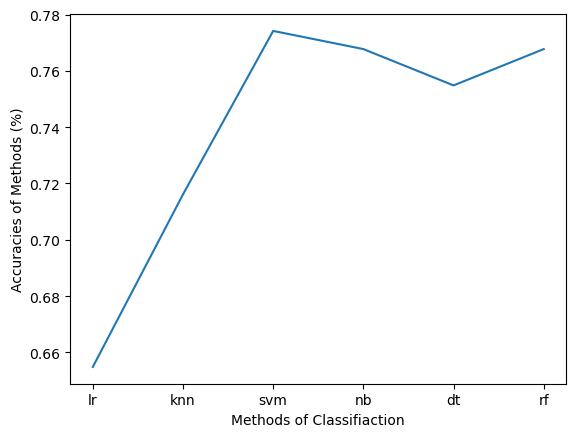

In [10]:
method_acc = []
for i in comparison_matrix.iloc[2:3,:].values:
    method_acc.append(i)

plt.plot(method_name, method_acc[0])
plt.xlabel("Methods of Classifiaction")
plt.ylabel("Accuracies of Methods (%)")
plt.show()

In [11]:
from joblib import dump
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([('scaler', StandardScaler()), ('svm', svm)])
pipe.fit(x, y)

dump(pipe, 'model.joblib')

['model.joblib']